<h1 style="text-align: center;">Step and Impulse Response of a RLC Band Pass Filter</h1>
<p style="text-align: center;">Lab 5</p>
<p style="text-align: center;">Spring 2024</p>

### 1. Purpose 
Use Laplace transforms to find the time-domain response of a RLC band pass filter to impulse and step inputs.  

### 2. Deliverables Overview 
##### Part 1  
[ ] Code for the impulse response as a function for **Task 1**.  
[ ] Plot for the impulse response from **Prelab 5**.  
[ ] Plot for the impulse response from **Task 2**
  
##### Part 2
[ ] Code and plot for **Task 1**.  
[ ] Hand calculated final value theorem in a markdown cell from **Task 2**.   

### 3. Part 1
##### 3.1 Purpose
In this part of the lab, you will plot the impulse response of the circuit given in the prelab in two ways:  
1. Using the hand-solved time-domain impulse response from the prelab, implemented as a function.  
2. Using the **scipy.signal.impulse()** function with the s-domain transfer function from the prelab.  
##### 3.2 Tasks   
###### 3.2.1 Example code  
The following code implements the Laplace domain transfer function $H(s) = \frac{s + 2}{s^2 + 3s +8}$.

In [1]:
import scipy.signal as sig
import numpy as np

steps = 1e-5
t = np.arange(0, 1.2e-3 + steps, steps)

num = [1, 2] # creates the numerator s + 2
den = [1, 3, 8] # creates the denominator s**2 + 3s + 8

tout, yout = sig.impulse((num, den), T = t)

*Note: Both plots from this section should be identical.*  
1. Plot the impulse response $h(t)$ that you found by hand in the prelab assignment from $0 \le t \le 1.2$ ms.  

In [2]:
# Insert all necessary imports here
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Insert code for your step function and the Sine Method as a function here. I will write the definition line and description as a hint.
def step(t): # my step function
    """
    Signal u(t) creation
    Inputs: t - time vector
    Oututs: u - generated signal u(t)
    """ 
    u = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] < 0:
            u[i] = 0
        else:
            u[i] = 1
    return u

def sine_method(R, L, C, t):
    """
    Uses the sine method to find the impulse response of a given RLC filter,
    
    Inputs: R - Resistor value in Ohms
            L - Inductor value in Henries
            C - Capacitor value in Farads
            t - time vector to determine the response
            
    Outputs: y - impulse response calculated using the Sine Method
    """
    p=-1/(2*R*C)+0.5*np.sqrt(1/((R*C)**2)-4/(L*C)+0*1j)
    g=(p/(R*C))
    y=(np.abs(g)/np.imag(p))*np.exp(np.real(p)*t)*np.sin(np.imag(p)*t+np.angle(g))*step(t)
    return y

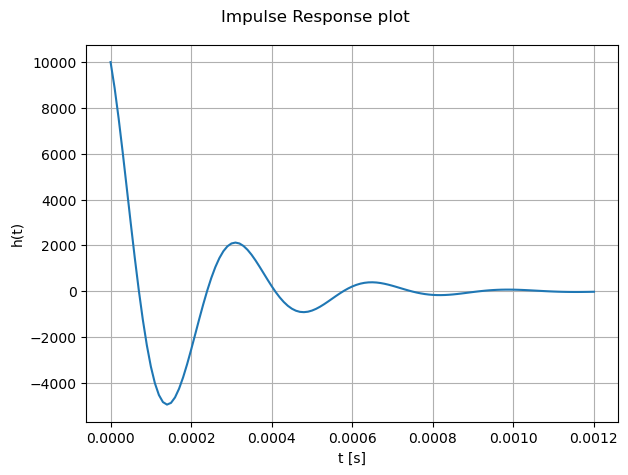

In [4]:
# Insert code calling your sine method function and plotting the impulse response here
steps = 1e-5
t = np.arange(0, 0.0012 + steps, steps)

plt.figure()
plt.suptitle("Impulse Response plot")

R = 1e3
L = 27e-3
C = 100e-9

y = sine_method(R, L, C, t)

plt.plot(t,y)
plt.grid()
plt.ylabel("h(t)")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()

2. Use the **scipy.signal.impulse()** function to plot the results from $0 \le t \le 1.2$ ms. 

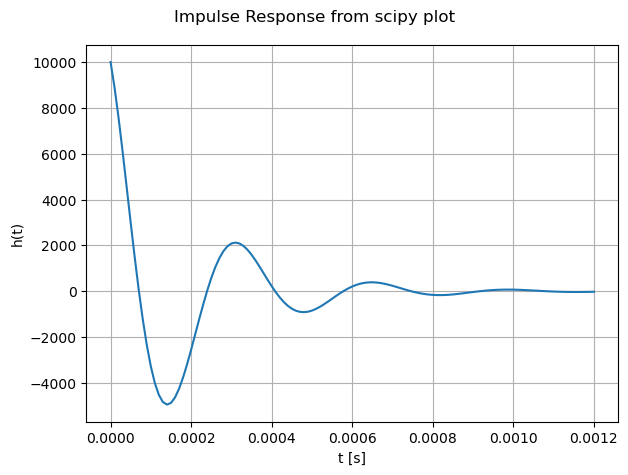

In [5]:
# Insert code using scipy.signal.impulse to find the impulse response here. This will be similar to the example code.
# Also, insert code plotting this response here.
steps = 1e-5
t = np.arange(0, 1.2e-3 + steps, steps)

num = [1/(R*C), 1]
den = [1, 1/(R*C), 1/(L*C)]

tout, yout = sig.impulse((num, den), T = t)


plt.figure()
plt.suptitle("Impulse Response from scipy plot")

plt.plot(tout,yout)
plt.grid()
plt.ylabel("h(t)")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()

### 4. Part 2
##### 4.1 Purpose
This section uses **scipy.signal.step()** function to plot the step response of the transfer function $H(s)$. Additionally, the final value theorem will be demonstrated.   
##### 3.2 Tasks   
1. Find the step response of $H(s)$ using the **scipy.signal.step()** function from $0 \le t \le 1.2$ ms.

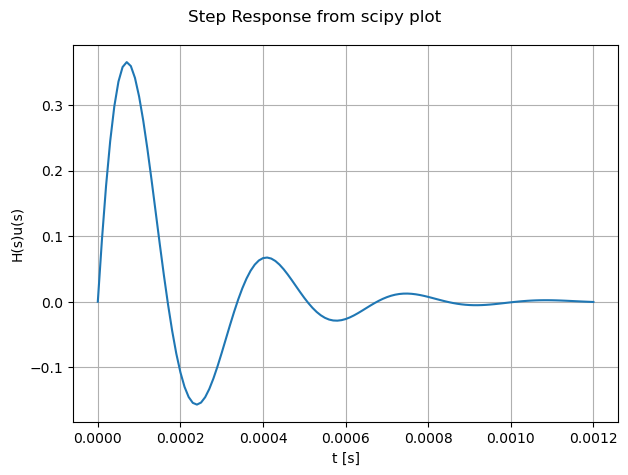

In [6]:
# Insert code using scipy.signal.step to find the step response here. 
# Also, insert code plotting this response here.
steps = 1e-5
t = np.arange(0, 1.2e-3 + steps, steps)

num = [1/(R*C), 1]
den = [1, 1/(R*C), 1/(L*C)]

tout, yout = sig.step((num, den), T = t)


plt.figure()
plt.suptitle("Step Response from scipy plot")

plt.plot(tout,yout)
plt.grid()
plt.ylabel("H(s)u(s)")
plt.xlabel("t [s]")

plt.tight_layout()
plt.show()

2. Perform the final value theorem for the step response $H(s)u(s)$ in the Laplace domain.
$$
\\
$$
$$
FVT = \lim_{s\to\ 0 } sH(s) = \lim_{s\to\ 0 } \frac{s\frac{1}{RC}}{s^2+s\frac{1}{RC}+\frac{1}{LC}} = \frac{0}{\frac{1}{LC}} = 0
$$

### 5. Questions
1. Explain the result of the Final Value Theorem from **Part 2** **Task 2** in terms of the physical circuit components.  
>The Final Value Theorem tells us what happens in the circuit when the time goes to infinity and the frequency goes to 0. As these things happen the capacitor become an open circuit and the inductor becomes a short circuit. The resistor doesn't change at all because it does not depend on frequency.
2. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>The class went over sin method yesterday. I did the prelab before and didn't realize that I was supposed to use the sin method.